<a href="https://colab.research.google.com/github/adeoluafo/FDSDE_AAfolabi/blob/main/ClassDemo/ClassDemo2_Happiness%209/16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [ ]:
rng = np.random.RandomState(1415)

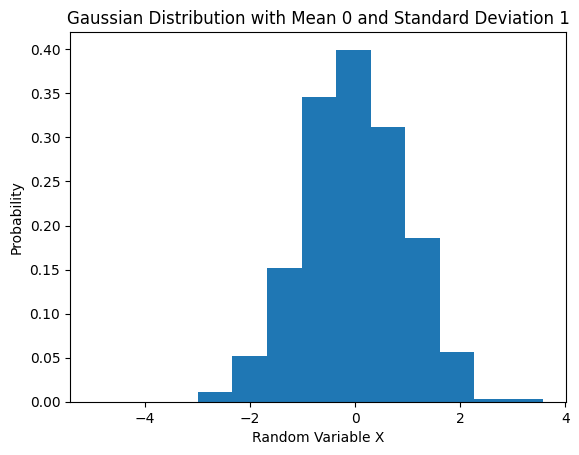

In [ ]:
x = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=rng)
plt.hist(x, density=True)
plt.xlabel("Random Variable X")
plt.ylabel("Probability")
plt.title("Gaussian Distribution with Mean 0 and Standard Deviation 1")

t = np.linspace(-5, -5,  num=1000)
pdf = stats.norm.pdf(t, loc=0, scale=1)

plt.plot(t, pdf)


plt.show()

Happiness Dataset


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
happiness15 = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/happines.csv")

In [ ]:
happiness15

In [ ]:
happiness15.head()

In [ ]:
happiness15.tail()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019
159,Gambia,NaN,4.516,NaN,0.30800,NaN,0.42800,0.38200,0.16700,0.26900,NaN,2019


In [ ]:
happiness15.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,160.000000,158.000000,160.000000,158.000000,160.000000,160.000000,160.000000,160.000000,158.000000,160.000000
mean,5.365756,0.047885,0.842979,0.991046,0.628037,0.428151,0.143023,0.236448,2.098977,2015.050000
std,1.141280,0.017146,0.402840,0.272369,0.246332,0.149803,0.119492,0.126605,0.553550,0.445805
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,4.517750,0.037268,0.539453,0.856823,0.437897,0.328630,0.061067,0.148800,1.759410,2015.000000
50%,5.203000,0.043940,0.901085,1.029510,0.695745,0.434635,0.107220,0.216130,2.095415,2015.000000
75%,6.193250,0.052300,1.155523,1.214405,0.809837,0.547057,0.179565,0.307547,2.462415,2015.000000
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2019.000000


<Axes: >

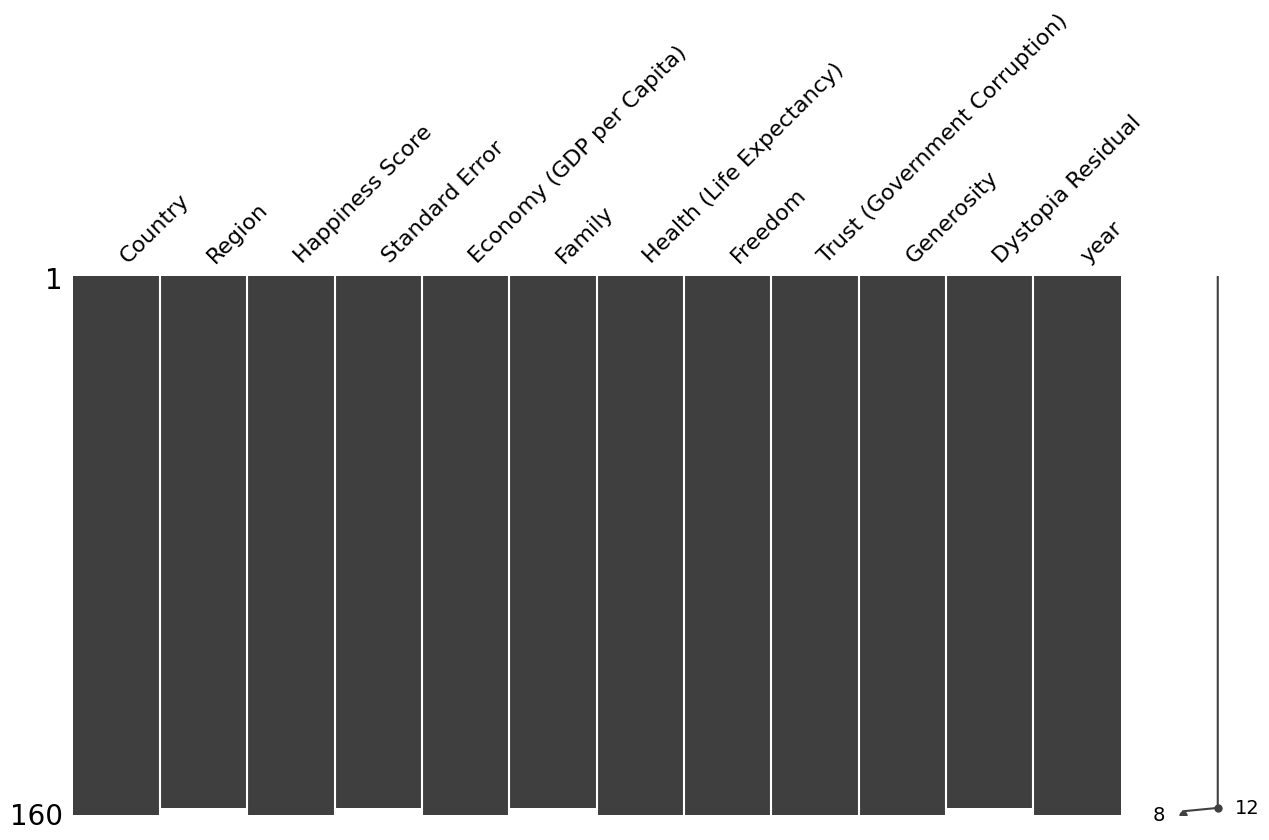

In [ ]:
import missingno as msno
msno.matrix(happiness15, figsize=(15, 7))

In [ ]:
happiness15.isna().sum()

,0
Country,0
Region,2
Happiness Score,0
Standard Error,2
Economy (GDP per Capita),0
Family,2
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0
Generosity,0


In [ ]:
happiness15.dropna(axis=0, how="any", inplace=True)

In [ ]:
happiness15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  year                           158 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 16.0+ 

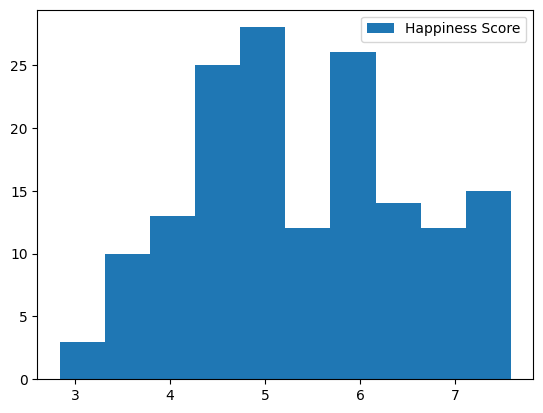

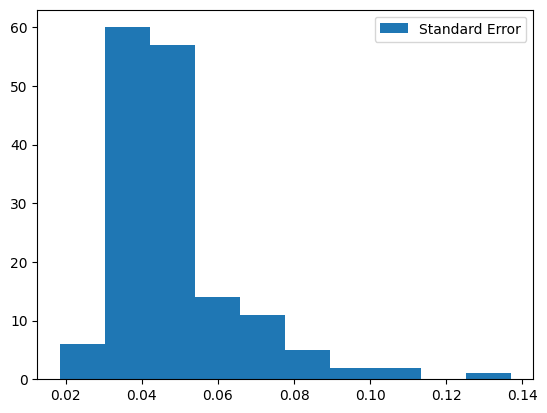

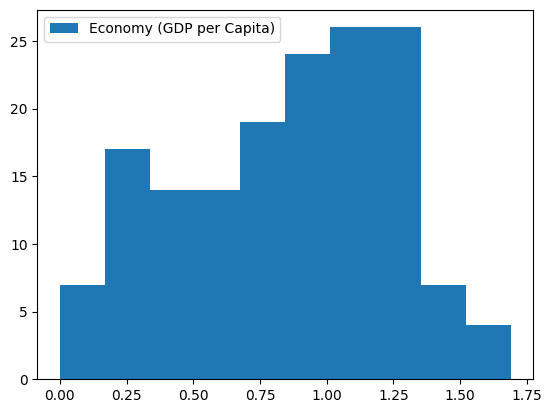

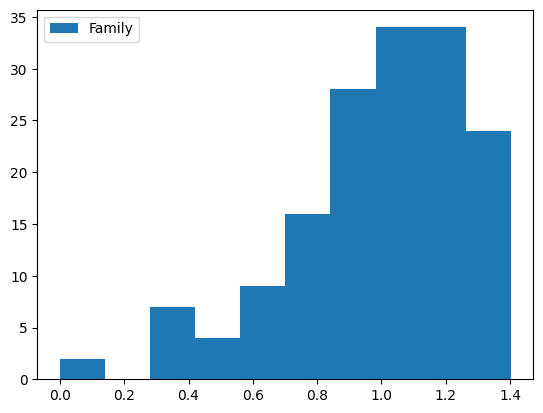

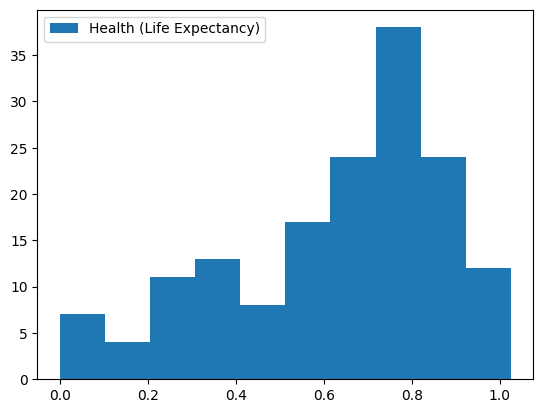

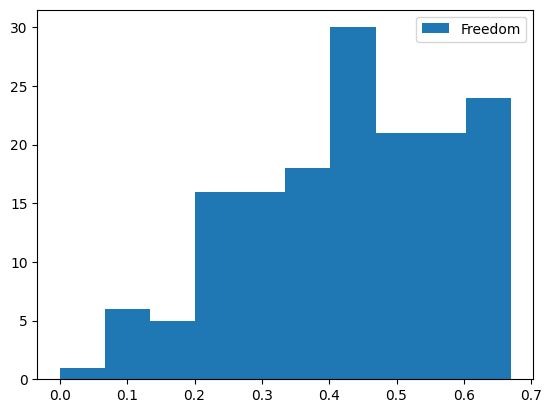

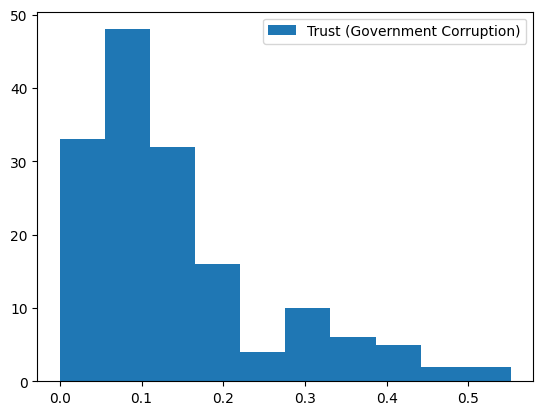

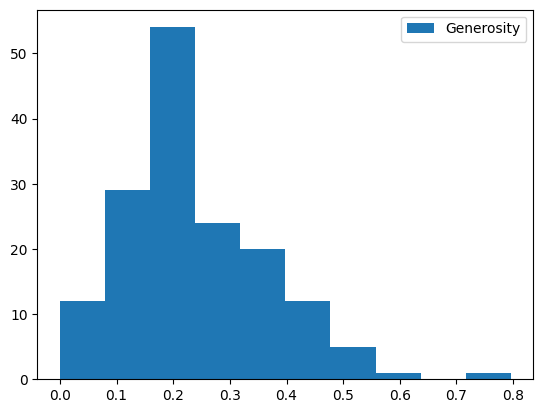

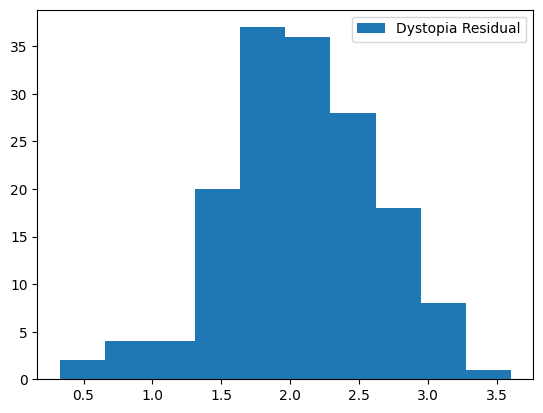

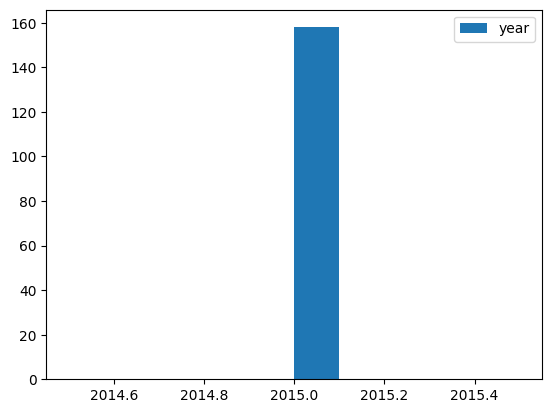

In [ ]:
for col in happiness15.columns:
  if happiness15[col].dtype == "object":
    continue
  plt.hist(happiness15[col], label=col)
  plt.legend()
  plt.show()

In [ ]:
mean = happiness15["Happiness Score"].mean()
stddev = happiness15["Happiness Score"].std()

print(mean, stddev)

5.375734177215189 1.1450101349520665


In [ ]:
happiness15.describe()["Happiness Score"]

,Happiness Score
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


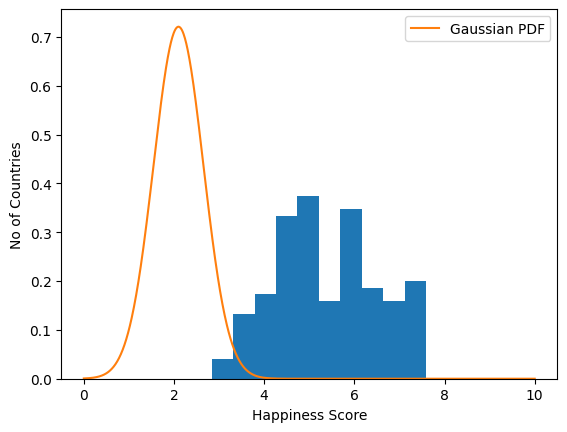

In [ ]:
mean = happiness15["Dystopia Residual"].mean()
stddev = happiness15["Dystopia Residual"].std()
t = np.linspace(0, 10, num=1000) #The support of the destribution
pdf = stats.norm.pdf(t, loc=mean, scale=stddev)

plt.hist(happiness15["Happiness Score"], density=True)
plt.xlabel("Happiness Score")
plt.ylabel("No of Countries")

plt.plot(t, pdf, label="Gaussian PDF")

plt.legend()

plt.show()